# Step 1: Mount data from google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 2: Import Libraries.

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
import numpy as np

# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Step 3: Unzip data.

In [ ]:
!unzip /content/drive/MyDrive/FinalCropSolModel.zip

Archive:  /content/drive/MyDrive/FinalCropSolModel.zip
   creating: FinalCropSolModel/
   creating: FinalCropSolModel/test/
   creating: FinalCropSolModel/test/Curry Leaves/
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (102).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (113).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (123).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (126).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (137).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (138).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (146).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (156).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (17).jpg  
  inflating: FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (170).jpg  
  infla

# Step 4: Load train and test data into separate variables.

In [ ]:
train_dir ="/content/FinalCropSolModel/train"
test_dir="/content/FinalCropSolModel/test"

# Step 5: Function to Get count of images in train and test data.

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

# Step 6: View number of images in each.

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

10 Classes
3290 Train images
946 Test images


# Step 7: Pre-processing our raw data into usable format.

In [ ]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

# Step 8: Generating augmented data from train and test directories.

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator = train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),
                                batch_size=batch_size)

test_generator = test_datagen.flow_from_directory(test_dir,shuffle=False,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size)

Found 3290 images belonging to 10 classes.
Found 946 images belonging to 10 classes.


# Step 9: Get 10 Diseases Names/classes.

In [ ]:
# The name of the 3 diseases.
train_generator.class_indices

{'Curry Leaves': 0,
 'Healthy Brinjal Leaf': 1,
 'Healthy Cassava Leaf': 2,
 'Healthy Centella asiatica (Gotu kola)': 3,
 'Lemon Leaf': 4,
 'Malabar spinach Leaf (Nivithi)': 5,
 'Potato Double Round Pattern Bottle disease': 6,
 'Red pepper Bacterial spot disease': 7,
 'Tomato Bacterial spot disease': 8,
 'Winged Bean leaf': 9}

# Step 10: Building CNN model.

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

**Types of layers**

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


**Take one image to visualize it's changes after every layer**

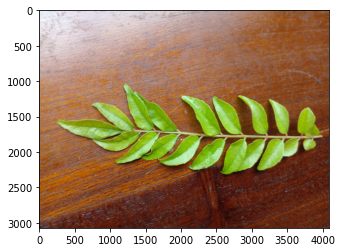

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = keras.utils.load_img('/content/FinalCropSolModel/train/Curry Leaves/Healthy Curry Leaves (104).jpg')
plt.imshow(img1);

#preprocess image
img1 = keras.utils.load_img('/content/FinalCropSolModel/train/Curry Leaves/Healthy Curry Leaves (104).jpg', target_size=(256, 256))
img = keras.utils.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

# Step 11: Visualisation of images after every layer.

In [ ]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_output = Model(inputs=model.input,outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)

flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)

flatten_features = flatten_output.predict(img)

1/1 [==============================] - 0s 90ms/step


**Image Visualizing - conv2d**

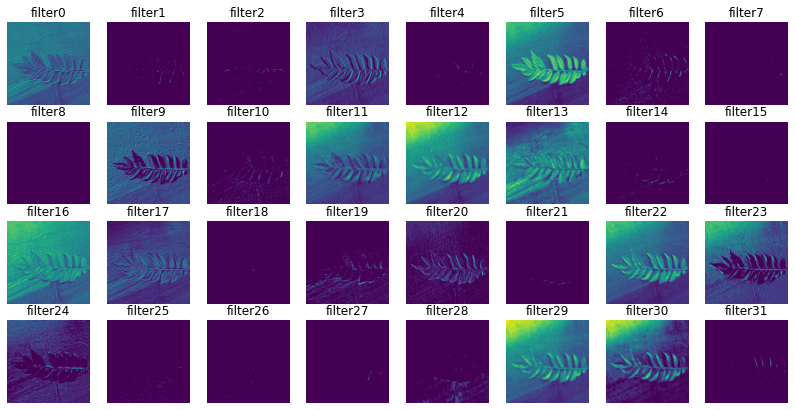

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

**Image Visualizing - max_pooling2d**

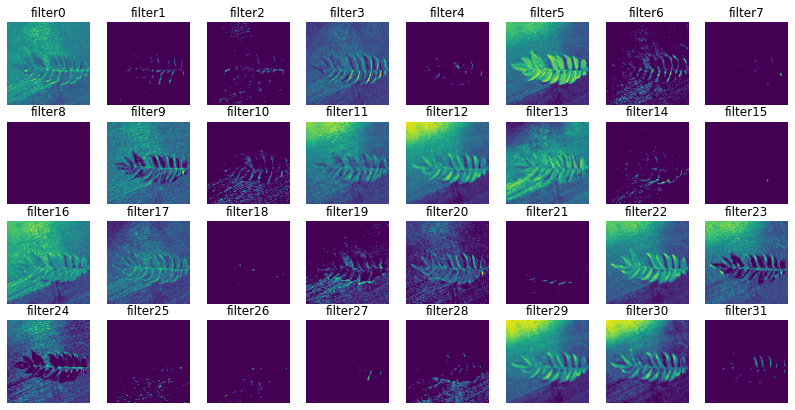

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

**Image Visualizing - conv2d_1**

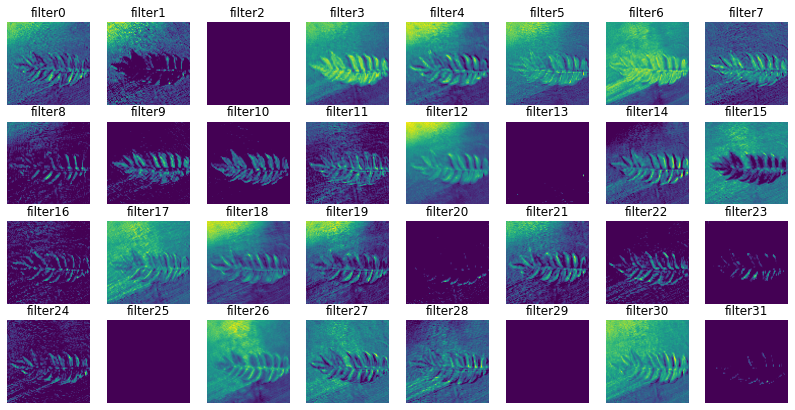

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

**Image Visualizing - max_pooling2d_1**

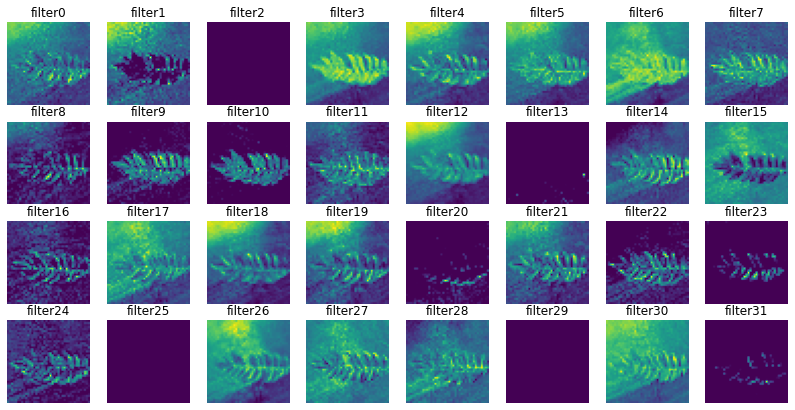

In [ ]:
#visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

**Image Visualizing - conv2d_2**

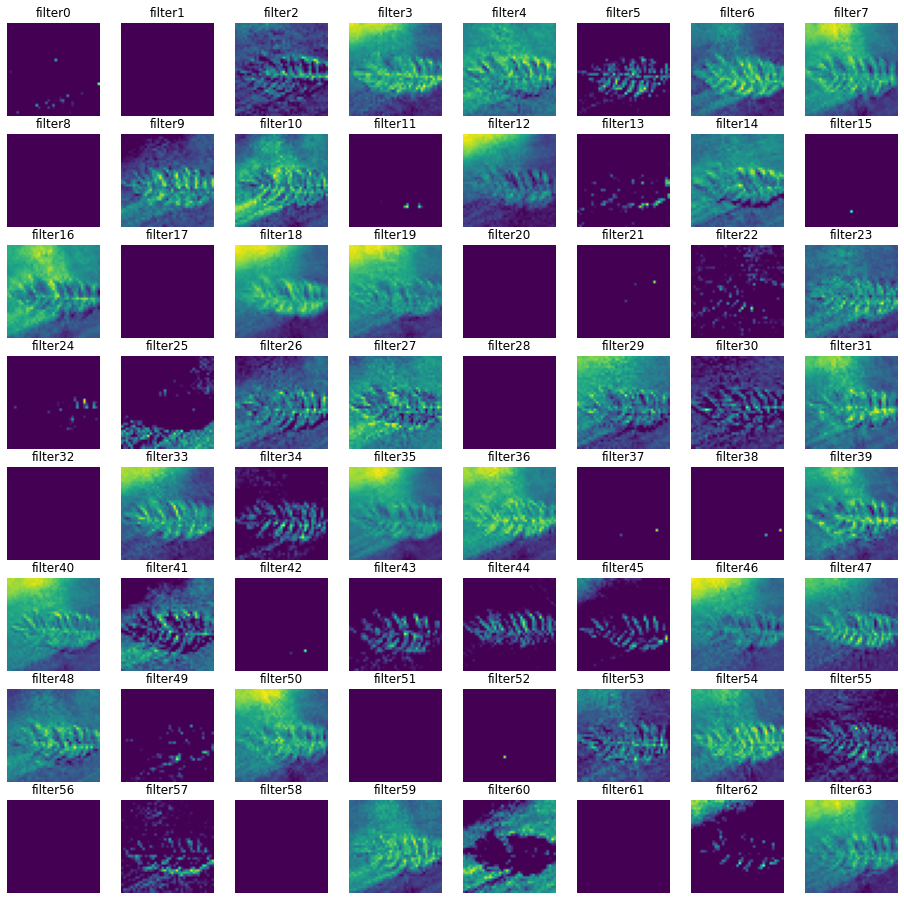

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

**Image Visualizing - max_pooling2d_2**

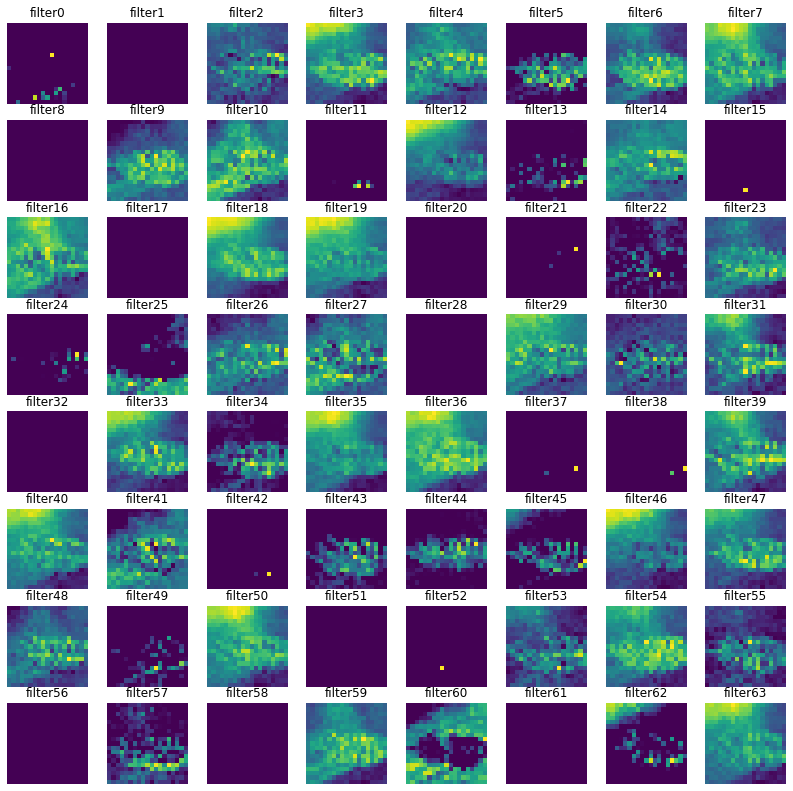

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()

# Step 12: Start Training CNN with Parameters.

In [ ]:
# validation data
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)

Found 3290 images belonging to 10 classes.


In [ ]:
from tensorflow import keras
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs = 10,
                          steps_per_epoch=train_generator.samples//batch_size,
                          validation_data = validation_generator, 
                          validation_steps = validation_generator.samples // batch_size,verbose=1)

Epoch 1/10
102/102 [==============================] - 895s 9s/step - loss: 1.2340 - accuracy: 0.5777 - val_loss: 0.4900 - val_accuracy: 0.8474
Epoch 2/10
102/102 [==============================] - 873s 9s/step - loss: 0.4475 - accuracy: 0.8508 - val_loss: 0.2869 - val_accuracy: 0.9090
Epoch 3/10
102/102 [==============================] - 885s 9s/step - loss: 0.2435 - accuracy: 0.9211 - val_loss: 0.1538 - val_accuracy: 0.9482
Epoch 4/10
102/102 [==============================] - 883s 9s/step - loss: 0.1723 - accuracy: 0.9383 - val_loss: 0.0864 - val_accuracy: 0.9660
Epoch 5/10
102/102 [==============================] - 885s 9s/step - loss: 0.1328 - accuracy: 0.9552 - val_loss: 0.0453 - val_accuracy: 0.9844
Epoch 6/10
102/102 [==============================] - 895s 9s/step - loss: 0.1186 - accuracy: 0.9601 - val_loss: 0.1202 - val_accuracy: 0.9544
Epoch 7/10
102/102 [==============================] - 887s 9s/step - loss: 0.0654 - accuracy: 0.9779 - val_loss: 0.0466 - val_accuracy: 0.9838

# Step 13: Plot For Accuracy And Losses.

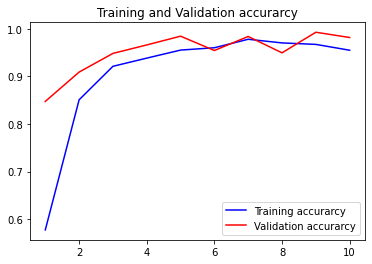

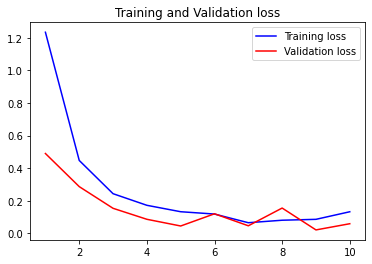

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Stap 14: Evaluate model using unseen data.

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

30/30 [==============================] - 98s 3s/step - loss: 0.1027 - accuracy: 0.9704
Test score is 0.10265861451625824
Test accuracy is 0.9704017043113708


# Step 15: Confusion Matrix.

In [ ]:
predictions= model.predict(test_generator,batch_size=10,verbose=0)

In [ ]:
import numpy as np

In [ ]:
y_pred = np.rint(predictions)
y_true = test_generator.classes

In [ ]:
rounded_labels = np.argmax(y_pred,axis=-1)
rounded_labels[1]

0

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [ ]:
cm = confusion_matrix(y_true,rounded_labels)

In [ ]:
print(classification_report(y_true,rounded_labels))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        46
           1       0.90      1.00      0.95        44
           2       0.98      1.00      0.99        54
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        48
           6       0.94      0.99      0.97       200
           7       0.98      0.89      0.93       200
           8       1.00      0.94      0.97       200
           9       0.96      1.00      0.98        52

    accuracy                           0.96       946
   macro avg       0.96      0.98      0.97       946
weighted avg       0.97      0.96      0.96       946



In [ ]:
def plot_confusion_matrix (cm , classes,
                           normalize = False , 
                           title = 'Confusion Matrix' ,
                           #figsize=(20,10), 
                           #fontsize=10, 
                           cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  #plt.figure(figsize=figsize)
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)



  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")

  else:
    print('Confusion Matrix,withoutnormalization')

  print(cm)

  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
      plt.text(j,i, cm[i , j],
                             horizontalalignment="center",
                             color = "white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  #plt.figure(figsize=(10,10))
  plt.ylabel('True Lable')
  plt.xlabel('Predicted Label')

Confusion Matrix,withoutnormalization
[[ 46   0   0   0   0   0   0   0   0   0]
 [  0  44   0   0   0   0   0   0   0   0]
 [  0   0  54   0   0   0   0   0   0   0]
 [  0   0   0  52   0   0   0   0   0   0]
 [  0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0  48   0   0   0   0]
 [  0   0   1   0   0   0 199   0   0   0]
 [  5   3   0   0   0   0  12 178   0   2]
 [  4   2   0   0   0   0   1   4 189   0]
 [  0   0   0   0   0   0   0   0   0  52]]


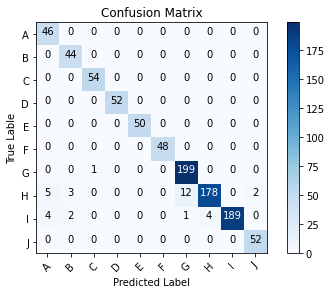

In [ ]:
cm_plot_labels = ["A","B","C","D","E","F","G","H","I","J"]
plot_confusion_matrix(cm, cm_plot_labels, title = 'Confusion Matrix')

# Step 16: Saving Model.

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('CropSolModel.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('CropSolModel_weights.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Curry Leaves': 0,
 'Healthy Brinjal Leaf': 1,
 'Healthy Cassava Leaf': 2,
 'Healthy Centella asiatica (Gotu kola)': 3,
 'Lemon Leaf': 4,
 'Malabar spinach Leaf (Nivithi)': 5,
 'Potato Double Round Pattern Bottle disease': 6,
 'Red pepper Bacterial spot disease': 7,
 'Tomato Bacterial spot disease': 8,
 'Winged Bean leaf': 9}

# Step 17: Load Model.

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('CropSolModel.h5')

# Mention name of the disease into list.
Classes = ["Curry Leaves","Healthy Brinjal Leaf","Healthy Cassava Leaf","Healthy Centella asiatica (Gotu kola)","Lemon Leaf","Malabar spinach Leaf (Nivithi)","Potato Double Round Pattern Bottle disease","Red pepper Bacterial spot disease","Tomato Bacterial spot disease","Winged Bean leaf"]

# Step 18: Predictions

1/1 [==============================] - 0s 114ms/step
Curry Leaves


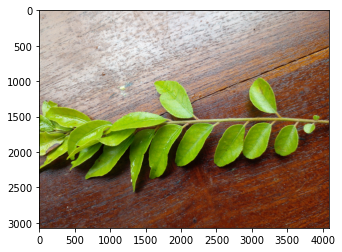

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256

from keras.preprocessing import image

def prepare(img_path):
    img = keras.utils.load_img(img_path, target_size=(256, 256))
    x = keras.utils.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
result = model.predict([prepare('/content/FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (156).jpg')])
disease = keras.utils.load_img('/content/FinalCropSolModel/test/Curry Leaves/Healthy Curry Leaves (156).jpg')
plt.imshow(disease)
print (Classes[int(np.max(result))])

# Step 19: Convert Model To "tflite format".

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model) 
tflite_model = converter.convert()

with open("FinalCropSolModel.tflite" , "wb") as f:
  f.write(tflite_model)